## Подготовка данных

In [1]:
from data_loading import *

In [ ]:
seq_np = generate_seq_np("../data/ecoli.genbank")

In [2]:
import glob
[print(x) for x in glob.glob("../results/dnn/*/*all_runs*")]
[print(x) for x in glob.glob("../results/dnn/*all_runs*")]

../results/dnn/2019-04-24-22-01/dnn_model_1_all_runs_p3_ecoli_100000_10000_6_0.pyob
../results/dnn/2019-04-24-10-38/dnn_model_1_all_runs_p3_ecoli_100000_10000_24_0.pyob
../results/dnn/dnn_model_1_all_runs_p3_ecoli_100000_10000_12_0.pyob


[None]

# Самая простая модель - однослойная

file ../results/dnn/2019-04-24-22-01/dnn_model_1_all_runs_p3_ecoli_100000_10000_6_0.pyob
Number of runs 24
MannwhitneyuResult(statistic=263.5, pvalue=0.31032639432779452)


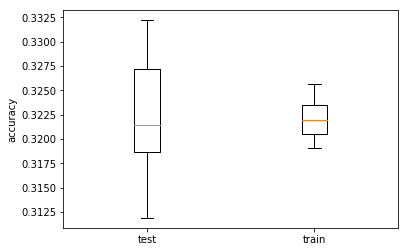

In [3]:
from data_loading import *
path = "../results/dnn/2019-04-24-22-01"
test, train = plot_hist(path)

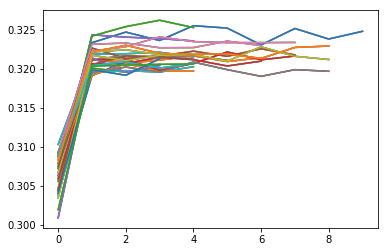

In [9]:
import pickle
for i in range(24):
    with open(path + '/{}_history.pyob'.format(i), "rb") as f:
        history = pickle.load(f)
        plt.plot(history['acc'])
plt.show()

file ../results/dnn/dnn_model_1_all_runs_p3_ecoli_100000_10000_12_0.pyob
Number of runs 30
MannwhitneyuResult(statistic=248.0, pvalue=0.0014444913141032551)


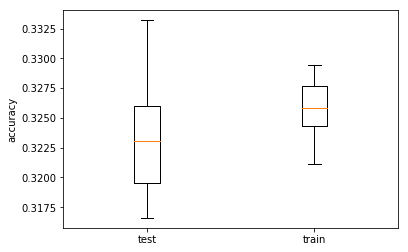

In [10]:
from data_loading import *
path = "../results/dnn/"
test, train = plot_hist(path)

file ../results/dnn/2019-04-24-10-38/dnn_model_1_all_runs_p3_ecoli_100000_10000_24_0.pyob
Number of runs 30
MannwhitneyuResult(statistic=302.0, pvalue=0.014602704784222504)


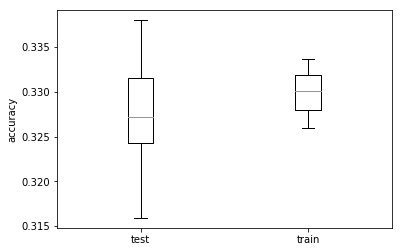

In [11]:
from data_loading import *
path = "../results/dnn/2019-04-24-10-38"
test, train = plot_hist(path)

In [17]:
import glob
path = "../results/dnn/2019-04-24-10-38"
glob.glob(path + "/*all_runs*")

['../results/dnn/2019-04-24-10-38/dnn_model_1_all_runs_p3_ecoli_100000_10000_24_0.pyob']

In [19]:
from data_loading import *
data = generate_data("../results/ecoli_100000_10000", enviroment_size = 24, shift = 0)[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [20]:
from keras.models import model_from_json
json_file = open(path+ '/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(path + "/0.weights")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loaded_model.evaluate(data.test1, data.test_ans)

Using TensorFlow backend.


InternalError: Failed to create session.

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


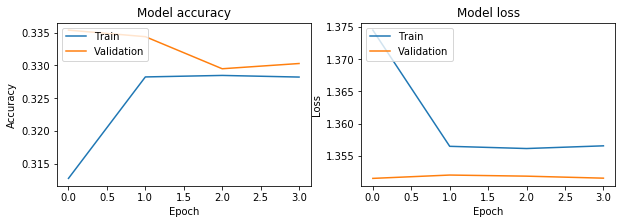

In [24]:
import pickle
%matplotlib inline

with open(path + '/0_history.pyob', "rb") as f:
    history = pickle.load(f)
plot_history(history)

## Теперь сетка сложнее - два слоя

In [7]:
from data_loading import *
data  = generate_data("../results/ecoli_10000_1000", 12, 0)[0]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

In [8]:
from dnn_models import *
model = create_dnn_model_2(12)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 12, 4)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 196       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________


In [9]:
def run_model(create_f, data, patience = 3):
    input_size = data.train1.shape[1]
    model = create_f(input_size)
    es = EarlyStopping(monitor='val_loss', verbose=1, patience=patience)
    history = model.fit(data.train1, data.train_ans, epochs=100, callbacks = [es], validation_data=(data.validate1, data.validate_ans))  
    return model, history

model, history = run_model(create_dnn_model_2, data)

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 9s 940us/step - loss: 1.4320 - acc: 0.2488 - val_loss: 1.3978 - val_acc: 0.2780
Epoch 2/100
10000/10000 [==============================] - 12s 1ms/step - loss: 1.3851 - acc: 0.2762 - val_loss: 1.3824 - val_acc: 0.2950
Epoch 3/100
10000/10000 [==============================] - 20s 2ms/step - loss: 1.3739 - acc: 0.3005 - val_loss: 1.3789 - val_acc: 0.3010
Epoch 4/100
10000/10000 [==============================] - 21s 2ms/step - loss: 1.3697 - acc: 0.3084 - val_loss: 1.3754 - val_acc: 0.3060
Epoch 5/100
10000/10000 [==============================] - 14s 1ms/step - loss: 1.3665 - acc: 0.3145 - val_loss: 1.3739 - val_acc: 0.3070
Epoch 6/100
10000/10000 [==============================] - 20s 2ms/step - loss: 1.3646 - acc: 0.3121 - val_loss: 1.3745 - val_acc: 0.3030
Epoch 7/100
10000/10000 [==============================] - 8s 760us/step - loss: 1.3629 - acc: 0.3144 - val_loss: 1.3740 -

In [10]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 131us/step


[1.3627350921630859, 0.30499999999999999]

/home/bvdmitri/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


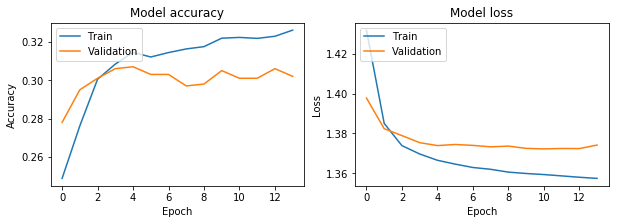

In [17]:
from data_loading import *
%matplotlib inline
plot_history(history.history)

In [134]:
for patience in [1, 2, 3, 4, 5]:
    with open("../results/dnn/dnn_model_2_all_runs_10_p{}.pyob".format(patience), "rb") as file:
        (test_accs_2, train_accs_2) = pickle.load(file)  
        print(patience, scipy.stats.mannwhitneyu(test_accs_2, train_accs_2))

1 MannwhitneyuResult(statistic=280.0, pvalue=0.0060981564698755391)
2 MannwhitneyuResult(statistic=327.5, pvalue=0.035615600447949369)
3 MannwhitneyuResult(statistic=313.0, pvalue=0.0217757180282925)
4 MannwhitneyuResult(statistic=268.0, pvalue=0.003637682983065064)
5 MannwhitneyuResult(statistic=268.5, pvalue=0.0037197602285726945)


 # Сравнение моделей

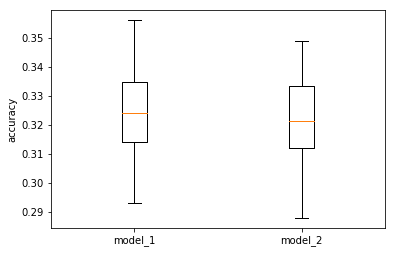

In [140]:
with open("../results/dnn/dnn_model_1_all_runs_10_p6.pyob", "rb") as file:
    (test_accs_1, train_accs_1) = pickle.load(file)  
    
with open("../results/dnn/dnn_model_2_all_runs_10_p3.pyob", "rb") as file:
    (test_accs_2, train_accs_2) = pickle.load(file) 
    
plt.boxplot([test_accs_1, test_accs_2])
plt.xticks([1, 2], ('model_1', 'model_2'))
plt.ylabel("accuracy")
plt.show()

In [141]:
print(scipy.stats.wilcoxon(test_accs_1, train_accs_2))
print(scipy.stats.mannwhitneyu(test_accs_1, train_accs_2))

WilcoxonResult(statistic=153.0, pvalue=0.10199257328585418)
MannwhitneyuResult(statistic=358.0, pvalue=0.088024730607560331)
